In [370]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import csv


In [371]:
path = Path('./sampledataset.csv')
lines = path.read_text().splitlines()

reader = csv.reader(lines)
header_row = next(reader)

m = 0
x_data, y_data = np.array([]),np.array([])
for row in reader:
    m += 1
    x_data = np.append(x_data, float(row[0]))
    y_data = np.append(y_data, float(row[1]))
    

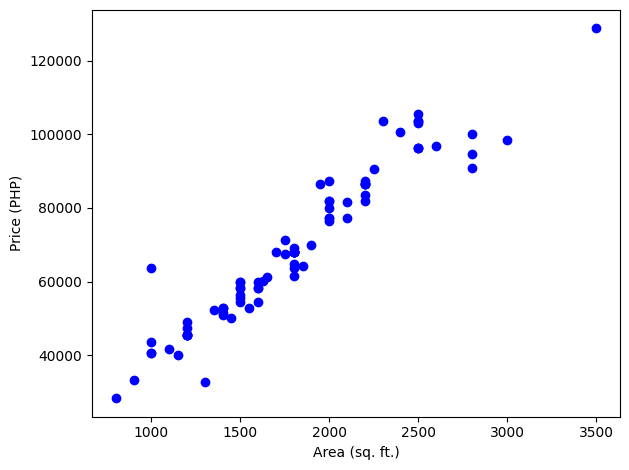

In [372]:
fig, ax = plt.subplots()

ax.scatter(x_data, y_data, c='blue')
ax.set_xlabel("Area (sq. ft.)")
ax.set_ylabel("Price (USD)")

# Adjust layout to prevent truncation
fig.tight_layout()

plt.show()

In [373]:
# Training
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
x_fit = np.array(x_data).reshape(-1, 1)
y_fit = np.array(y_data).reshape(-1, 1)
reg.fit(x_fit, y_fit)

coef = reg.coef_[0][0] # slope
intercept = reg.intercept_[0] # y-intercept



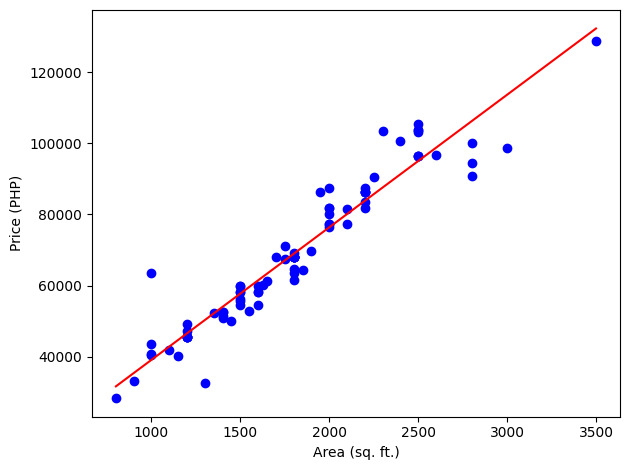

In [374]:
# Getting the result of the Linear Regression Training

x_range = np.linspace(x_data.min(),x_data.max(),m)
y_range = reg.predict(x_range.reshape(-1,1))

fig2, ax2 = plt.subplots()
ax2.scatter(x_data, y_data, c='blue')
ax2.set_xlabel("Area (sq. ft.)")
ax2.set_ylabel("Price (USD)")

# Adjust layout to prevent truncation
fig2.tight_layout()

ax2.plot(x_range, y_range, c='red')

plt.show()

In [375]:
reg.predict([[1000]]) # Predicting the price of a 1000 sq. ft. house

array([[39159.20010482]])

In [376]:
from sklearn.metrics import root_mean_squared_error
y_predict = [reg.predict([[x]])[0][0].item() for x in x_data]
rmse = root_mean_squared_error(y_data, y_predict)
print(rmse)

6047.324507845472
